# Bussines Understanding For Feature Selection

Melakukan analisa riwayat keuangan nasabah dari sumber biro keuangan. Menggambarkan 1 ID user memiliki beberapa transaksi.

## Importing Data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# @title Membuat Function
def missing_col (data, treshold):
  missing= (data.isnull().sum()/len(data))*100
  col_missing = missing[missing > treshold].index
  data.drop(columns= col_missing, inplace=True)
  return data

def kategori_dokument (jumlah):
  if jumlah == 0:
    return 'empty'
  elif jumlah > 10 :
    return 'complate'
  else:
    return 'incomplate'

def information_flag (jumlah):
  if jumlah >= 1 :
    return '1'
  else:
    return '0'

### Bureau Balance and Bureau

In [13]:
bureau_balance = pd.read_csv('/content/bureau_balance.csv')
bureau = pd.read_csv('/content/bureau.csv')
print('Jumlah Data Bureau Balance yang dimiliki: ',bureau_balance.shape)
print('Jumlah Data Bureau yang dimiliki: ',bureau.shape)

Jumlah Data Bureau Balance yang dimiliki:  (17229703, 3)
Jumlah Data Bureau yang dimiliki:  (1716428, 17)


In [14]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0.0,C
1,5715448,-1.0,C
2,5715448,-2.0,C
3,5715448,-3.0,C
4,5715448,-4.0,C


In [15]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [16]:
bureau.sort_values(by='SK_ID_CURR').head(7)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,0.0,0.0,Consumer credit,-6,4630.5
248489,100001,5896635,Active,currency 1,-49,0,1778.0,NaN,NaN,0,378000.0,373239.0,0.0,0.0,Consumer credit,-16,10822.5
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248490,100001,5896636,Active,currency 1,-320,0,411.0,NaN,NaN,0,168345.0,110281.5,NaN,0.0,Consumer credit,-10,9364.5


In [17]:
# @title Cross Cek Missing Value Data Bureau
(bureau.isnull().sum()/len(bureau))*100

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473490
dtype: float64

In [18]:
# @title Cross Cek Missing Value Data Bureau Balance
(bureau_balance.isnull().sum()/len(bureau_balance))*100

SK_ID_BUREAU      0.000000
MONTHS_BALANCE    0.000006
STATUS            0.000006
dtype: float64

In [19]:
# menghapus missing col diatas 10%
treshold = 10
bureau = missing_col(bureau,treshold)
bureau = bureau.dropna()

In [20]:
# @title Join tabel Bureau balace dengan bureau
bureauu = pd.merge(bureau_balance,bureau, how='inner',on='SK_ID_BUREAU' )
print(f'Jumlah duplikat SK_ID_CURR: ',{bureauu['SK_ID_CURR'].duplicated().sum()})
print(f'Jumlah duplikat SK_ID_BUREAU: ',{bureauu['SK_ID_BUREAU'].duplicated().sum()})
print(bureauu.shape)
bureauu.head(30)

Jumlah duplikat SK_ID_CURR:  {14505362}
Jumlah duplikat SK_ID_BUREAU:  {14137461}
(14602886, 14)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,5715448,0.0,C,380361,Active,currency 1,-820,0,31069.0,0,67500.0,0.0,Credit card,-183
1,5715448,-1.0,C,380361,Active,currency 1,-820,0,31069.0,0,67500.0,0.0,Credit card,-183
2,5715448,-2.0,C,380361,Active,currency 1,-820,0,31069.0,0,67500.0,0.0,Credit card,-183
3,5715448,-3.0,C,380361,Active,currency 1,-820,0,31069.0,0,67500.0,0.0,Credit card,-183
4,5715448,-4.0,C,380361,Active,currency 1,-820,0,31069.0,0,67500.0,0.0,Credit card,-183
5,5715448,-5.0,C,380361,Active,currency 1,-820,0,31069.0,0,67500.0,0.0,Credit card,-183
6,5715448,-6.0,C,380361,Active,currency 1,-820,0,31069.0,0,67500.0,0.0,Credit card,-183
7,5715448,-7.0,C,380361,Active,currency 1,-820,0,31069.0,0,67500.0,0.0,Credit card,-183
8,5715448,-8.0,C,380361,Active,currency 1,-820,0,31069.0,0,67500.0,0.0,Credit card,-183
9,5715448,-9.0,0,380361,Active,currency 1,-820,0,31069.0,0,67500.0,0.0,Credit card,-183


In [21]:
bureauu['CREDIT_ACTIVE'].nunique()

4

In [22]:
bureauu.groupby(['CREDIT_ACTIVE','SK_ID_CURR']).agg({'MONTHS_BALANCE':'count'}).reset_index().sort_values(by='SK_ID_CURR')

,CREDIT_ACTIVE,SK_ID_CURR,MONTHS_BALANCE
0,Active,100001,32
72655,Closed,100001,140
72656,Closed,100002,58
72657,Closed,100013,66
1,Active,100019,34
...,...,...,...
72651,Active,456234,33
157169,Closed,456247,107
72652,Active,456247,35
157170,Closed,456253,62


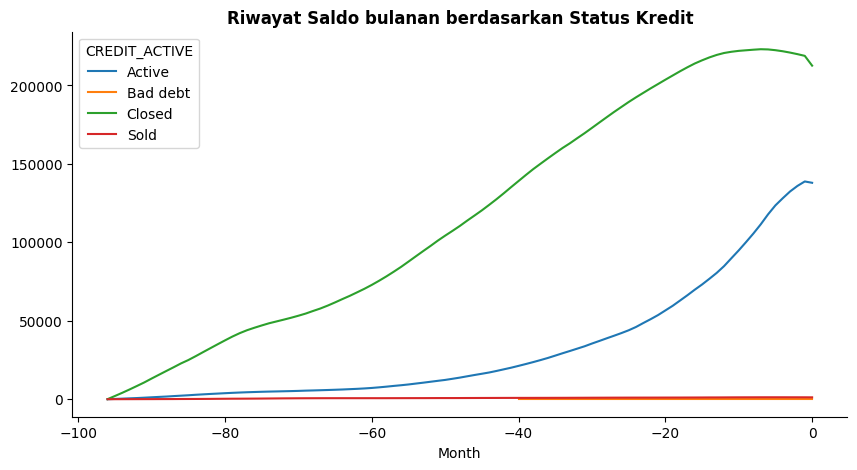

' Dari hasil grafik dibawah menunjukan bahwa secara keseluruhan, mayoritas client yang terdapat pada data ini merupakan client yang baru\nmulai mengajukan pinjaman dimana saldo bulannya masih bernilai 0 dan untuk diatas 0 diidentifikasi sebagai bulan pencairan pinjaman '

In [23]:
bulan = bureauu.groupby(['CREDIT_ACTIVE','MONTHS_BALANCE']).agg({'SK_ID_CURR':'count'}).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='MONTHS_BALANCE', y='SK_ID_CURR', hue='CREDIT_ACTIVE', data=bulan)
plt.title('Riwayat Saldo bulanan berdasarkan Status Kredit',fontweight='bold')
plt.xlabel('Month')
plt.ylabel('')
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

''' Dari hasil grafik dibawah menunjukan bahwa secara keseluruhan, mayoritas client yang terdapat pada data ini merupakan client yang baru
mulai mengajukan pinjaman dimana saldo bulannya masih bernilai 0 dan untuk diatas 0 diidentifikasi sebagai bulan pencairan pinjaman '''

In [24]:
avg_credit_total= bureauu.groupby(['CREDIT_ACTIVE','STATUS'])['AMT_CREDIT_SUM'].mean().reset_index()
avg_credit_total.sort_values(by='AMT_CREDIT_SUM',ascending=True)

,CREDIT_ACTIVE,STATUS,AMT_CREDIT_SUM
8,Bad debt,X,1.212750e+05
15,Closed,C,2.385201e+05
16,Closed,X,2.465615e+05
21,Sold,4,2.711166e+05
11,Closed,2,3.241921e+05
9,Closed,0,3.259160e+05
10,Closed,1,3.342510e+05
12,Closed,3,3.602457e+05
13,Closed,4,3.979580e+05
3,Active,3,4.246851e+05


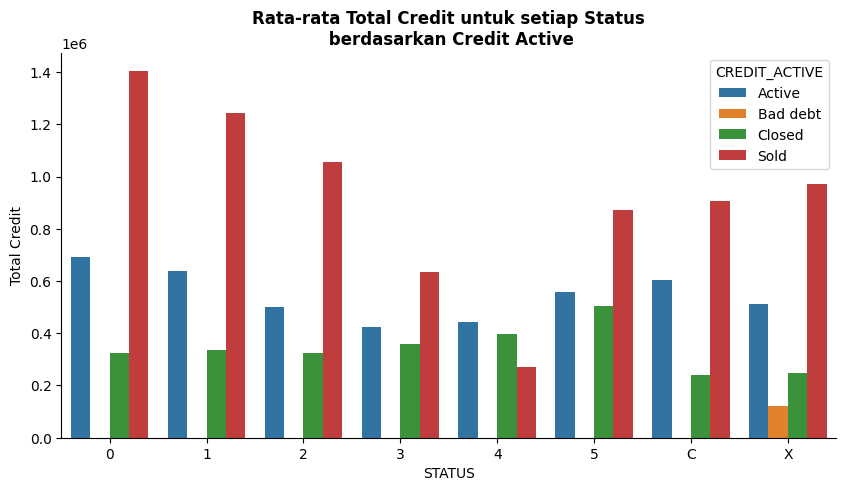

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='STATUS',y='AMT_CREDIT_SUM', data=avg_credit_total, hue='CREDIT_ACTIVE')
plt.title('Rata-rata Total Credit untuk setiap Status\n berdasarkan Credit Active', fontweight='bold',fontsize=12)
plt.ylabel('Total Credit')
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

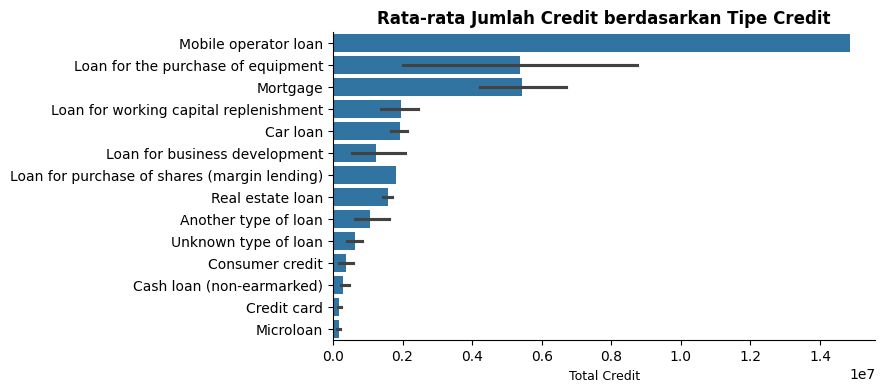

In [26]:
# @title Rata-rata Total Credit berdasarkan Tipe Credit
avg_credit_total= (bureauu.groupby(['CREDIT_ACTIVE','CREDIT_TYPE'])['AMT_CREDIT_SUM'].mean().reset_index()).sort_values(by='AMT_CREDIT_SUM', ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x='AMT_CREDIT_SUM',y='CREDIT_TYPE', data=avg_credit_total)
plt.title('Rata-rata Jumlah Credit berdasarkan Tipe Credit', fontweight='bold',fontsize=12)
plt.xlabel('Total Credit', fontsize=9)
plt.ylabel('')
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

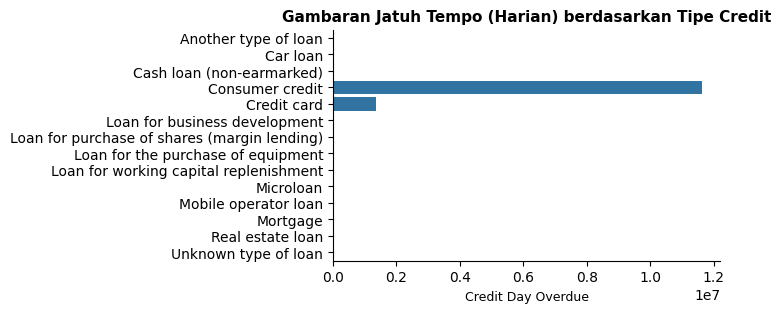

In [27]:
# @title Total Jatuh Tempo berdasarkan Status Kredit
lambat_bayar = bureauu.groupby('CREDIT_TYPE')['CREDIT_DAY_OVERDUE'].sum().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='CREDIT_DAY_OVERDUE', y='CREDIT_TYPE', data=lambat_bayar)
plt.title('Gambaran Jatuh Tempo (Harian) berdasarkan Tipe Credit',fontweight='bold', fontsize=11)
plt.xlabel('Credit Day Overdue', fontsize=9)
plt.ylabel('')
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

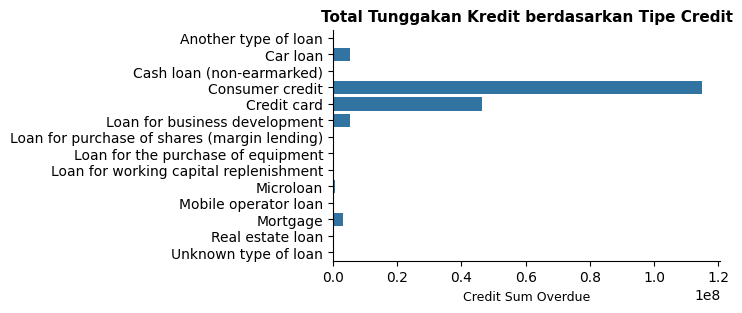

In [28]:
# @title Jumlah Pembayaran Terlambat berdasarkan Status Kredit
lambat_bayar = bureauu.groupby('CREDIT_TYPE')['AMT_CREDIT_SUM_OVERDUE'].sum().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='AMT_CREDIT_SUM_OVERDUE', y='CREDIT_TYPE', data=lambat_bayar)
plt.title('Total Tunggakan Kredit berdasarkan Tipe Credit', fontweight='bold',fontsize=11)
plt.xlabel('Credit Sum Overdue', fontsize=9)
plt.ylabel('')
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

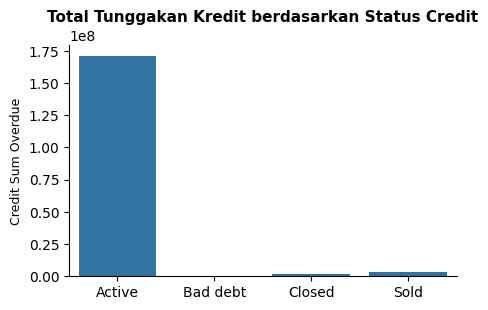

In [29]:
# Jumlah Pembayaran Jatuh Tempo berdasarkan Status Kredit
lambat_bayar = bureauu.groupby('CREDIT_ACTIVE')['AMT_CREDIT_SUM_OVERDUE'].sum().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='CREDIT_ACTIVE', y='AMT_CREDIT_SUM_OVERDUE', data=lambat_bayar)
plt.title('Total Tunggakan Kredit berdasarkan Status Credit', fontweight='bold',fontsize=11)
plt.xlabel('')
plt.ylabel('Credit Sum Overdue', fontsize=9)
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

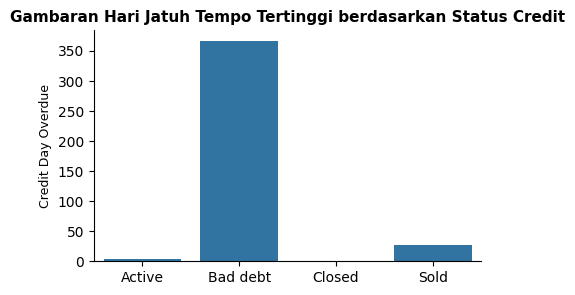

In [30]:
lambat_hari_bayar = bureauu.groupby('CREDIT_ACTIVE')['CREDIT_DAY_OVERDUE'].mean().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='CREDIT_ACTIVE', y='CREDIT_DAY_OVERDUE', data=lambat_hari_bayar)
plt.title('Gambaran Hari Jatuh Tempo Tertinggi berdasarkan Status Credit',fontweight='bold', fontsize=11)
plt.xlabel('')
plt.ylabel('Credit Day Overdue', fontsize=9)
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

In [31]:
hari_bayar = bureauu.groupby('CREDIT_ACTIVE')['CREDIT_DAY_OVERDUE'].sum().reset_index()
hari_bayar['AVG_Overdue'] = (hari_bayar['CREDIT_DAY_OVERDUE'] / len(bureauu))*100
hari_bayar

,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,AVG_Overdue
0,Active,10749675,73.613360
1,Bad debt,15006,0.102761
2,Closed,316156,2.165024
3,Sold,1929740,13.214785


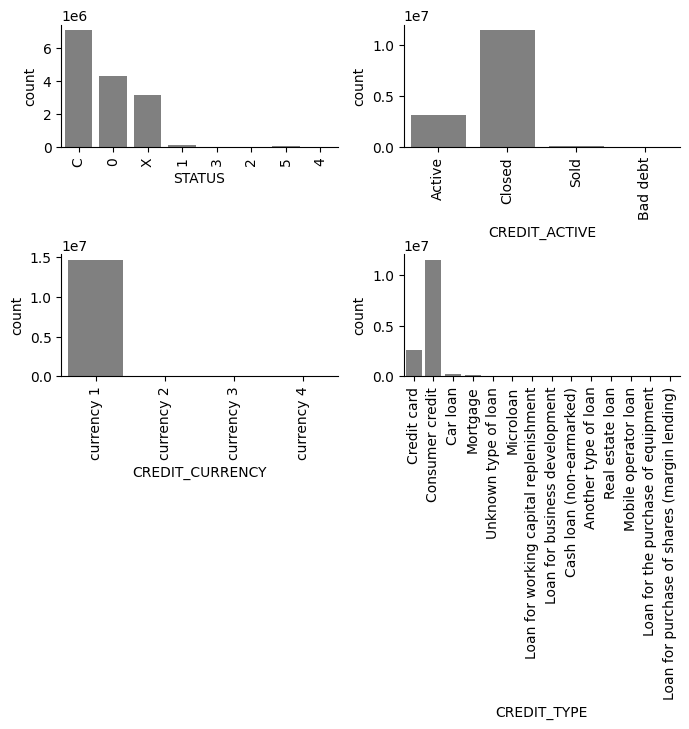

In [32]:
# @title Visualisasi Feature Kategorikal
kategorikal = bureauu.select_dtypes(include='object')
kategori = kategorikal.columns
feature = kategori

plt.figure(figsize=(7,5))
for i in range(0, len(feature)):
  plt.subplot(2, 2, i+1)
  sns.countplot(x=bureauu[feature[i]], color='grey')
  plt.gca().spines[['top','right']].set_visible(False)
  plt.xticks(rotation=90)
  plt.tight_layout()

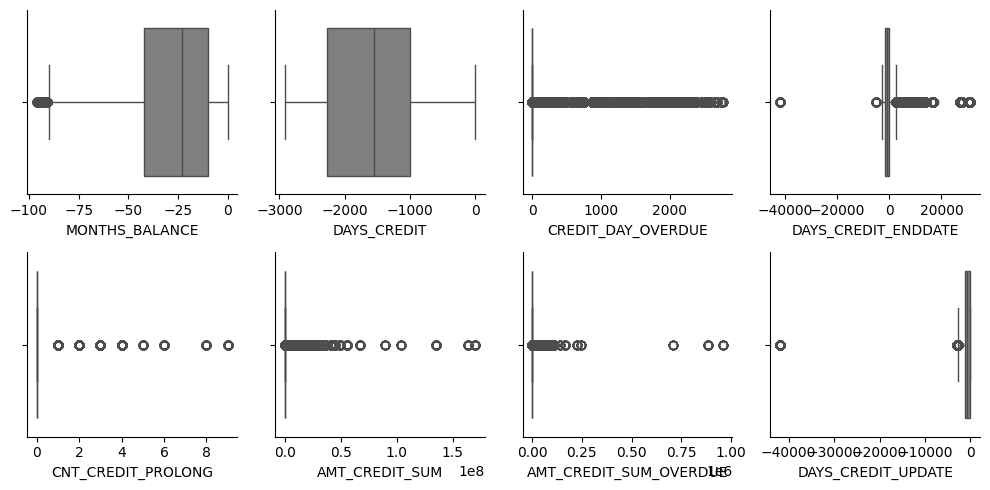

In [33]:
# @title Visualisasi Feature Numerikal
numerikal = bureauu.select_dtypes(exclude='object')
numeric =numerikal.drop(columns=['SK_ID_BUREAU','SK_ID_CURR']).columns

plt.figure(figsize=(10,5))
for i in range(0, len(numeric)):
  plt.subplot(2, 4, i+1)
  sns.boxplot(x=bureauu[numeric[i]], color='grey',orient='v')
  plt.gca().spines[['top','right']].set_visible(False)
  plt.tight_layout()